<a href="https://colab.research.google.com/github/Ethancatepete/gef2021_aiot_exercise_notebooks/blob/main/Finished_of_CNN_fashsion_MNIST(student_version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model for the Fashion MNIST dataset**

In the last notebook, you have implemented a neural network model for the Fashion MNIST dataset, what was your model's accuracy on the testing set? Do you think we can further improve it?

\
In this notebook you will implement a Convolutional Neural Network (CNN) model to improve the prediction accuracy

\
**Instruction: type your code when you see 'Type your code here' in comments**

In [83]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print('Tensorflow version:',tf.__version__)
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
from sklearn.model_selection import train_test_split

import os
print('Keras version:', tf.keras.__version__)

Num GPUs Available:  1
Tensorflow version: 2.9.2
Keras version: 2.9.0


# Loading the fashion_mnist data set training set

In [84]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [85]:
print(f'Shape of an image: {x_train[0].shape}')
print(f'Max pixel value: {x_train.max()}')
print(f'Min pixel value: {x_train.min()}')
print(f'Classes: {np.unique(y_train)}')

Shape of an image: (28, 28)
Max pixel value: 255
Min pixel value: 0
Classes: [0 1 2 3 4 5 6 7 8 9]


In [86]:
# Creating a list of labels

fashion_mnist_labels = ["T-shirt/top", 
                            "Trouser",
                            "Pullover",
                            "Dress",
                            "Coat",
                            "Sandal", 
                            "Shirt",
                            "Sneaker",
                            "Bag",
                            "Ankle boot"]

# Plotting some of the images



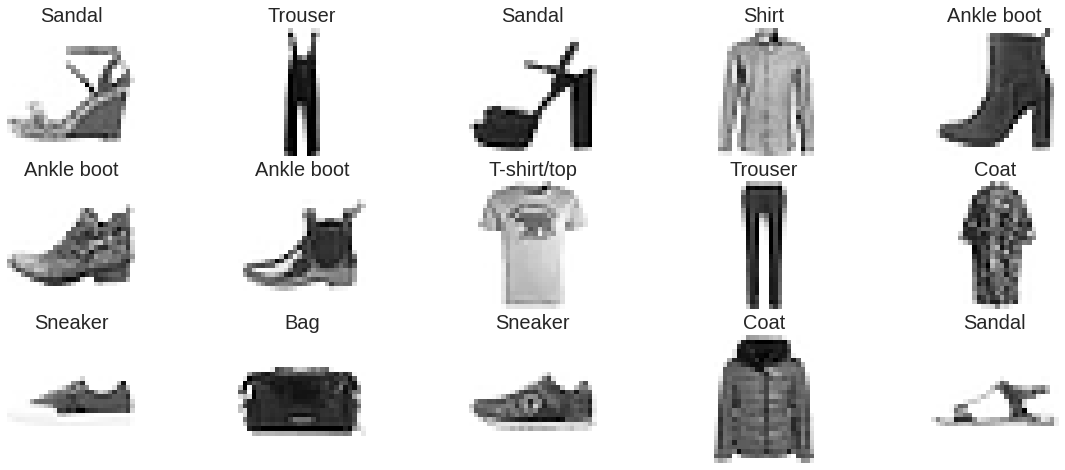

In [87]:
figure = plt.figure(figsize=(20,8))

indices = np.random.choice(np.arange(x_train.shape[0]), 15, replace=False)
subset = x_train[indices]

for i, image_sample in enumerate(subset):
  ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  j = fashion_mnist_labels[y_train[indices[i]]] #image label
  ax.set_title(j, fontsize=20)
  ax.imshow(image_sample.reshape(28,28))
  i+=1

In [88]:
#Type your code here

x_train = x_train /255   #feature scaling (Hint:255 is the maximum pixel value)
x_test =  x_test / 255

num_classes = 10 #no. of classes

train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)  #one hot encoding for the training set
test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)#one hot encdoing for the testing set

print(y_train[0])
print(train_one_hot[0])


train_size = x_train.shape[0]
test_size = x_test.shape[0]


print(f'Max pixel value: {x_train.max()}')
print(f'Min pixel value: {x_train.min()}')
print(f'Train size: {train_size}, Test size: {test_size}')
print(f'Train data shape: {x_train.shape}, Test data shape: {x_test.shape}')
print(f'Train label shape: {train_one_hot.shape}, Test label shape: {test_one_hot.shape}')


9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Max pixel value: 1.0
Min pixel value: 0.0
Train size: 60000, Test size: 10000
Train data shape: (60000, 28, 28), Test data shape: (10000, 28, 28)
Train label shape: (60000, 10), Test label shape: (10000, 10)


# **Model training**

## Task: In this section, we are going to define our CNN model

***Implement a CNN according to the below figure, it consists of:***

1.   **an input layer**
> Shape = INPUT_SHAPE
2.   **a CNN layer**
> No. of filter = 2,
> Kernel size = (3,3),
> Strides = (1,1),
> Padding = 'same',
> Activation='relu'
3.   **a pooling layer (try MaxPooling2D first, then AveragePooling2D to compare accuracy)**
> Pool size = (2,2), Strides = (1,1)
4.   **a flatten layer**
5.   **a dense layer**
> No. of hidden units = 100, Activation = 'relu'
6.   **an output (dense) layer**
> Activation = 'softmax'
**Hint: Remember to specify the input shape in the first layer**



![](https://drive.google.com/uc?export=view&id=1mZ33zg7PwfVNXF9ea-39fu_biV43FFYO)

**Links to the documentation for your reference:**

Input layer:
https://www.tensorflow.org/api_docs/python/tf/keras/Input

Convolutional layer:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

Pooling layer:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D


Flatten layer:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten


Dense layer:
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense







In [100]:
#Type your code here

# Reshaping the data
INPUT_SHAPE = [28, 28, 1]

x_train = x_train.reshape([-1]+INPUT_SHAPE)
x_test = x_test.reshape([-1]+INPUT_SHAPE)

print(f'Train data shape: {x_train.shape}, Test data shape: {x_test.shape}')


Train data shape: (60000, 28, 28, 1), Test data shape: (10000, 28, 28, 1)


In [90]:

'''
No difference
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
'''

In [91]:
#x_train[-1]

In [92]:
from tensorflow.keras.layers import *


tf.keras.backend.clear_session()

#Type your code here

#Define and compile your model
#=============================================

inputs = tf.keras.Input(shape=INPUT_SHAPE)

layer1 = tf.keras.layers.Conv2D(filters = 2, kernel_size = (3,3), strides = (1,1), padding = 'same', activation='relu')(inputs)

#pooling = tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (1,1))(layer1)
pooling = tf.keras.layers.AveragePooling2D(pool_size = (2,2), strides=(1,1))(layer1)


flattening = tf.keras.layers.Flatten()(pooling)

densed = tf.keras.layers.Dense(units=num_classes, activation = 'softmax')(flattening)


model = tf.keras.Model(inputs = inputs, outputs = densed)



optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)



model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=["accuracy"]
              )


#=============================================
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 2)         20        
                                                                 
 average_pooling2d (AverageP  (None, 27, 27, 2)        0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 1458)              0         
                                                                 
 dense (Dense)               (None, 10)                14590     
                                                                 
Total params: 14,610
Trainable params: 14,610
Non-trainable params: 0
_________________________________________________________

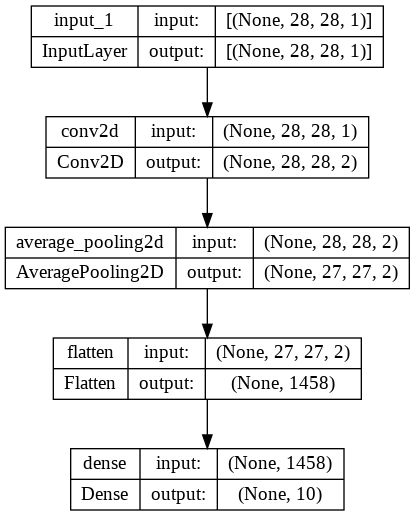

In [93]:
tf.keras.utils.plot_model(model, "cnn_model.png", show_shapes=True)

## **Defining callback functions and training the model**

In [94]:

from tensorflow.keras.callbacks import EarlyStopping

#Type your code here
#batch-128, epochs=100 is best
batch_size = 128
epochs = 100

#Early Stopping callback function
es = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    min_delta=0,
    patience=5,
    verbose=1,
    mode = 'max',
    restore_best_weights = True


)

# Starting the training
history = model.fit(x_train, train_one_hot, epochs=epochs, batch_size=batch_size,
                    validation_split=0.3, callbacks=[es])#calling model.fit()




Epoch 1/100
329/329 [==============================] - 2s 5ms/step - loss: 0.7951 - accuracy: 0.7556 - val_loss: 0.5070 - val_accuracy: 0.8210
Epoch 2/100
329/329 [==============================] - 2s 5ms/step - loss: 0.4683 - accuracy: 0.8375 - val_loss: 0.4494 - val_accuracy: 0.8423
Epoch 3/100
329/329 [==============================] - 1s 4ms/step - loss: 0.4281 - accuracy: 0.8495 - val_loss: 0.4294 - val_accuracy: 0.8492
Epoch 4/100
329/329 [==============================] - 1s 4ms/step - loss: 0.4071 - accuracy: 0.8577 - val_loss: 0.4118 - val_accuracy: 0.8552
Epoch 5/100
329/329 [==============================] - 1s 4ms/step - loss: 0.3932 - accuracy: 0.8626 - val_loss: 0.4126 - val_accuracy: 0.8544
Epoch 6/100
329/329 [==============================] - 1s 4ms/step - loss: 0.3856 - accuracy: 0.8642 - val_loss: 0.3970 - val_accuracy: 0.8627
Epoch 7/100
329/329 [==============================] - 1s 4ms/step - loss: 0.3782 - accuracy: 0.8679 - val_loss: 0.3872 - val_accuracy: 0.8661

# **Plotting the learning curves**

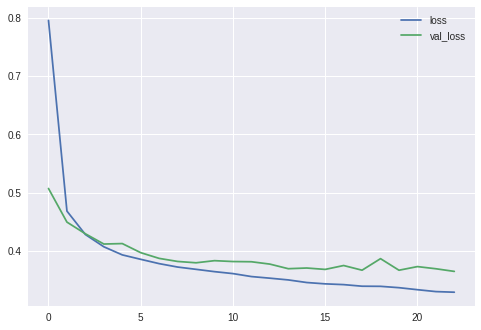

In [95]:
res = pd.DataFrame(history.history)
res[['loss','val_loss']].plot()

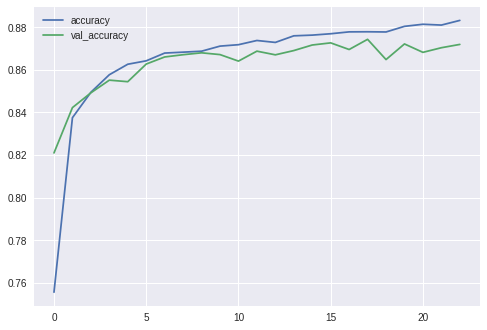

In [96]:
res[['accuracy','val_accuracy']].plot()

# **Model evaluation on test set**

In [97]:
#Type your code here

scores = model.evaluate(x_test, test_one_hot, verbose=1)   #calling model.evaluate()
names = model.metrics_names

for i in range(len(scores)):
  print(f'{names[i]}: {scores[i]:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8624
loss: 0.3890
accuracy: 0.8624


# **Making predictions and plotting the result**

In [98]:
#Type your code here

prediction = model.predict(x_test) #calling model.predict() here


print(
    f'sum: {np.sum(prediction, axis=1)}\n'
    f'predict index: {np.argmax(prediction, axis=1)}'
)

313/313 [==============================] - 0s 1ms/step
sum: [1.         1.         0.99999994 ... 1.0000001  0.99999994 0.99999994]
predict index: [9 2 1 ... 8 1 5]


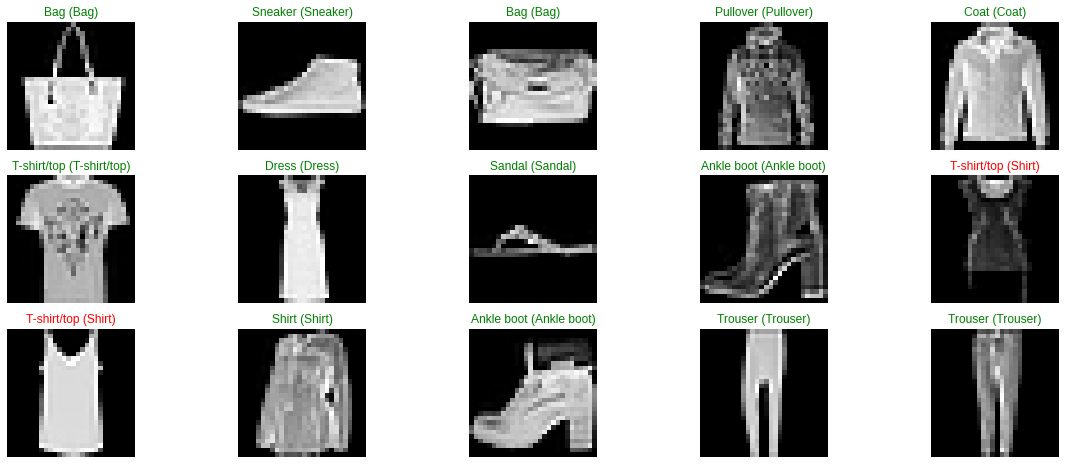

In [99]:
figure = plt.figure(figsize=(20,8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
   
    ax.imshow(x_test[index].reshape(28,28), cmap='gray')
    predict_index = np.argmax(prediction[index])
    true_index = np.argmax(test_one_hot[index])
   
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

Are you satisfied with this model? Can the model be further improved?